<a href="https://colab.research.google.com/github/Evertonvcf/Demonstracao_Projeto_Final-/blob/main/Semana_7_Notebook_Videoaulas19_20_21_ProjetoFinal_Introduc%CC%A7a%CC%83o_a_Cie%CC%82ncia_de_Dados_COM350.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Demonstração Projeto Final
###Disciplina - Introdução a Ciência de Dados - Univesp
###Videoaulas 19, 20 e 21
###Prof. Dr. José Eduardo Santarem Segundo

#Aula 19

#Importar Bibliotecas

In [1]:

!pip install pandas==1.5.3 numpy==1.23.5 sweetviz==2.1.4 --force-reinstall
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

  Using cached pandas-1.5.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
  Using cached sweetviz-2.1.4-py3-none-any.whl.metadata (19 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached matplotlib-3.10.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached scipy-1.16.0-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (61 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached importlib_resources-6.5.2-py3-none-any.whl.metadata (3.9 kB)
  Using cached MarkupSafe-3.0.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.0 kB)
  Using cached contourpy-1.3.2-cp311-cp311-manylinux_2_17_

#Importar dados (veja que vamos utilizar um dataset que o próprio Google Colab disponibiliza) - /sample_data/california_housing_train.csv


In [2]:
dados=pd.read_csv('./sample_data/california_housing_train.csv')

In [3]:
dados.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,48500.0
8,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,58400.0
9,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48100.0


#Análise Exploratória


###Id - Id única de cada local
###latitude- latitude do local
###longitude- longitude do local
###median_age- mediana das idades das casas no local
###total_rooms - contagem do total de cômodos na região
###total_bedrooms - contagem do total de quartos na região
###population - população total na região
###households - número total de casas na região
###median_income- mediana da renda das pessoas na região (em dezenas de milhares por ano)
###median_house_value -mediana dos valores das casas da região - **variável-alvo**

Este conjunto de dados contém uma linha por grupo de blocos do censo. Um grupo de quarteirões é a menor unidade geográfica para a qual o U.S. Census Bureau publica dados de amostra (um grupo de quarteirões normalmente tem uma população de 600 a 3.000 pessoas).

In [4]:
dados.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [5]:
dados.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
!pip install sweetviz
import sweetviz

In [7]:
analise=sweetviz.analyze(dados)
analise.show_html('eda_analise.html')

/usr/local/lib/python3.11/dist-packages/sweetviz/dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
/usr/local/lib/python3.11/dist-packages/sweetviz/dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |          | [  0%]   00:00 -> (? left)

/usr/local/lib/python3.11/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/usr/local/lib/python3.11/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/usr/local/lib/python3.11/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/usr/local/lib/python3.11/dist-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result

Report eda_analise.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


##Mapa de calor (correlação de variáveis)

/tmp/ipython-input-8-3302298259.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(dados.corr(), dtype=np.bool))


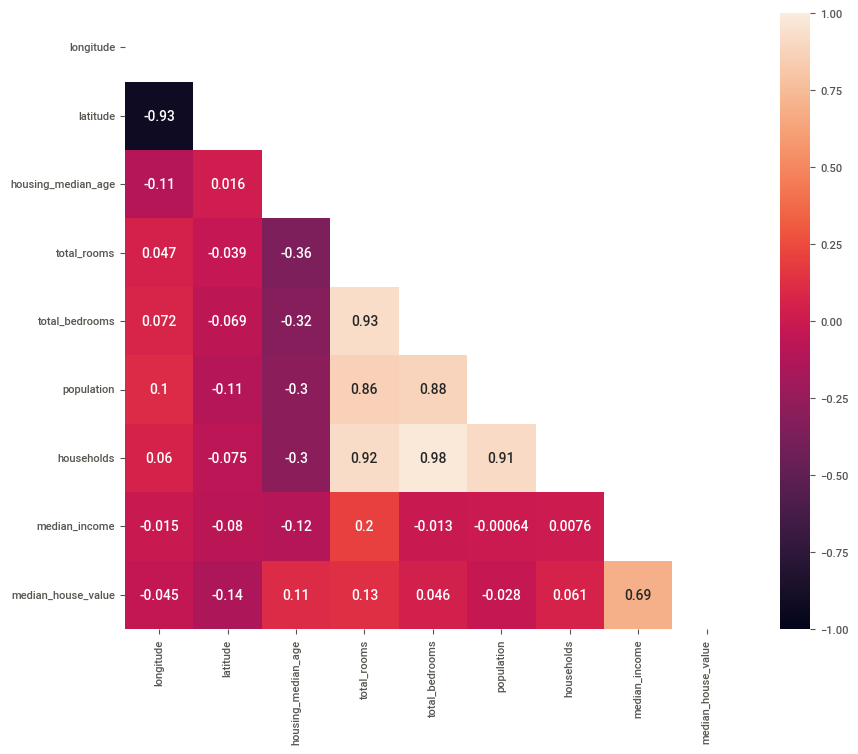

In [8]:
mask = np.triu(np.ones_like(dados.corr(), dtype=np.bool))
plt.figure(figsize=(10,8))
sns.heatmap(dados.corr(), mask=mask, square = True, annot=True, vmin=-1, vmax=1)
plt.show()

###Varias observações no mapa de calor, mas veja que interessante median_income com median_house_value e também households com total_bedrooms

#Aula 20

#Iniciar o processo de Machine Learning

### Como esse dataset é pré-pronto (usado em muitos exemplos de livros, sites, etc,) não há muito o que pré-processar dos dados.
### Vamos inicialmente determinar o alvo (preço médio das casas)

In [9]:
y=dados['median_house_value']
#y=dados.median_house_value
y

,median_house_value
0,66900.0
1,80100.0
2,85700.0
3,73400.0
4,65500.0
...,...
16995,111400.0
16996,79000.0
16997,103600.0
16998,85800.0


###Escolher as features (váriveis a serem utilizadas do seu conjunto de dados)

In [10]:
features=['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income']

In [11]:
X=dados[features]

In [12]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250
...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797


#Construindo o modelo

## Usar Scikit-Learn
###**Define** = Escolha de modelo (define parâmetros)
###**Fit** = Treinar
###**Predict** = Fazer a Predição
###**Evaluate** = Avaliar os resultados

In [13]:
from sklearn.neighbors import KNeighborsRegressor

#Vamos usar como teste um KNN Regressor (diferente da semana anterior quando utilizamos um Classificator).

In [14]:
modelo = KNeighborsRegressor(7)

#Treinar o Modelo (isso é ML, simples né)

In [15]:
modelo.fit(X,y)

KNeighborsRegressor(n_neighbors=7)

In [16]:
dados.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [17]:
X.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250


#Fazer a predição

In [18]:
modelo.predict(X.head(5))

array([113671.42857143, 220957.14285714, 132700.        , 211886.        ,
       150714.28571429])

###**Validar o modelo**
erro=atual - previsao (achar a diferença)

In [19]:
from sklearn.metrics import mean_absolute_error

In [20]:
predicao=modelo.predict(X)

In [21]:
predicao

array([113671.42857143, 220957.14285714, 132700.        , ...,
       134071.42857143, 131814.28571429, 300628.71428571])

In [22]:
mean_absolute_error(y,predicao)

65274.25744537815

#Vamos ver isso em um dataframe (valor esperado e predição)

In [23]:
dados2=pd.DataFrame(y)

In [24]:
dados2['predicao']=predicao

In [25]:
dados2.sample(10)

,median_house_value,predicao
8036,382400.0,243400.000000
5235,154400.0,201200.000000
9178,214200.0,191671.428571
2341,117300.0,127128.571429
6705,136400.0,150814.285714
13117,213600.0,230271.571429
5112,250700.0,274643.000000
11225,73500.0,184600.142857
10058,76800.0,136728.571429
13658,217000.0,146171.428571


In [26]:
dados2.describe()

,median_house_value,predicao
count,17000.000000,17000.000000
mean,207300.912353,206562.988420
std,115983.764387,76645.241869
min,14999.000000,70042.857143
25%,119400.000000,150221.428571
50%,180400.000000,187214.285714
75%,265000.000000,245675.000000
max,500001.000000,500001.000000


#Validação (agora de uma maneira diferente)

In [27]:
from sklearn.model_selection import train_test_split

#Pegar parte dos dados (aqui 80%) pra treinar e ai testar nos outros 20%

In [28]:
treino_X, val_X, treino_y, val_y = train_test_split(X,y,random_state=1,train_size=0.8)

In [29]:
treino_X.shape

(13600, 8)

In [30]:
modelo2 = KNeighborsRegressor(3)

In [31]:
modelo2.fit(treino_X,treino_y)

KNeighborsRegressor(n_neighbors=3)

In [32]:
predicao2=modelo2.predict(val_X)

#Analisar o erro (ver outros números de vizinhos)

In [33]:
mean_absolute_error(val_y,predicao2)

81475.73088235295

#Aula 21

##Usando Arvores de Decisão (outro tipo de algoritmo)

In [34]:
from sklearn.tree import DecisionTreeRegressor

In [35]:
modelotree=DecisionTreeRegressor(random_state=1,max_depth=8)
#modelotree=DecisionTreeRegressor(random_state=1,min_samples_leaf=15)

In [36]:
modelotree.fit(X,y)

DecisionTreeRegressor(max_depth=8, random_state=1)

In [37]:
predicaotree=modelotree.predict(X)

In [38]:
mean_absolute_error(y,predicaotree)

39463.72868156455

#Agora vamos fazer separando treino e teste (lembre-se que isso torna seu modelo mais real)

In [39]:
modelotree.fit(treino_X, treino_y)

DecisionTreeRegressor(max_depth=8, random_state=1)

In [40]:
predicao=modelotree.predict(val_X)

In [41]:
mean_absolute_error(val_y,predicao)

43579.727038184596

#USando Random Forest

In [42]:
from sklearn.ensemble import RandomForestRegressor

In [43]:
modelorf=RandomForestRegressor(random_state=1,n_jobs=-1,n_estimators=500)

In [44]:
modelorf.fit(treino_X, treino_y)

RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=1)

In [45]:
predicao=modelorf.predict(val_X)

In [46]:
mean_absolute_error(val_y,predicao)

31058.257090000003